In [2]:
import numpy as np
import csky as cy

In [3]:
repo = cy.selections.Repository()
version = 'version-003-p02'
specs = cy.selections.PSDataSpecs.ps_v3

In [5]:
ana = cy.get_analysis(repo, version, specs)

Setting up Analysis for:
IC86v3_2012_2017
Setting up IC86v3_2012_2017...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2012_MC.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2017_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC86_2013_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC86_2014_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC86_2015_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC86_2016_exp.npy ...
Reading 

In [37]:
pstracks_10yr = np.loadtxt('pstracks_10yr_E3.txt')
pstracks_flux = pstracks_10yr[:,1]
pstracks_sd = pstracks_10yr[:,0]

In [38]:
fluxs = []
for i,dec in enumerate(np.arcsin(pstracks_sd)):
    print(np.degrees(dec), end='\r', flush=True)
    src = cy.utils.sources(0, dec=dec)
    tr = cy.get_trial_runner(ana=ana, src=src, flux=cy.hyp.PowerLawFlux(3))
    ns = tr.to_ns(pstracks_flux[i], E0=1, unit=1e3)
    flux_100TeV = tr.to_E2dNdE(ns, E0=100, unit=1e3)
    fluxs.append(flux_100TeV)

In [43]:
np.save('pstracks10yr_E3_100TeV_conversion.npy', fluxs)

In [39]:
import matplotlib.pyplot as plt

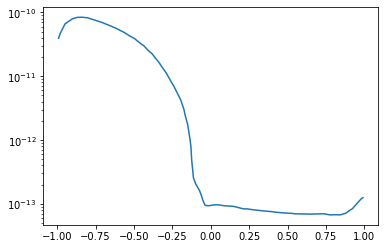

In [40]:
plt.semilogy(pstracks_sd, fluxs, )